# FMA Song genre prediction

## Read in and clean data

(17714, 15)

In [3]:



tracks = pd.read_csv('./tracks-clean-no-nans.csv')
# we prep this 
tracks = tracks.loc[tracks['genre_top'].isin(['Hip-Hop', 'Rock'])]
tracks.to_csv('./fma-rock-vs-hiphop.csv', index=False)

# Read in the data

In [3]:
import pandas as pd

tracks = pd.read_csv('./fma-rock-vs-hiphop.csv')
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17734 entries, 0 to 17733
Data columns (total 21 columns):
track_id         17734 non-null int64
bit_rate         17734 non-null int64
comments         17734 non-null int64
composer         166 non-null object
date_created     17734 non-null object
date_recorded    1898 non-null object
duration         17734 non-null int64
favorites        17734 non-null int64
genre_top        17734 non-null object
genres           17734 non-null object
genres_all       17734 non-null object
information      482 non-null object
interest         17734 non-null int64
language_code    4089 non-null object
license          17714 non-null object
listens          17734 non-null int64
lyricist         53 non-null object
number           17734 non-null int64
publisher        52 non-null object
tags             17734 non-null object
title            17734 non-null object
dtypes: int64(8), object(13)
memory usage: 2.8+ MB


As you can see there are plenty of missing values. Find the proportion of missing values for each column and remove the columns that have more than 50% missing values from the dataset. For the remaining columns, remove the individual NA observations.

In [6]:
# Task: Figure out and drop NAs appropriately
tracks.isna().mean().sort_values()

track_id         0.000000
number           0.000000
listens          0.000000
interest         0.000000
tags             0.000000
genres           0.000000
genre_top        0.000000
genres_all       0.000000
duration         0.000000
date_created     0.000000
comments         0.000000
bit_rate         0.000000
favorites        0.000000
title            0.000000
license          0.001128
language_code    0.769426
date_recorded    0.892974
information      0.972821
composer         0.990639
lyricist         0.997011
publisher        0.997068
dtype: float64

In [7]:
tracks = (tracks
 .dropna(subset=['license'])
 .dropna(axis=1)
)

tracks.head()

,track_id,bit_rate,comments,date_created,duration,favorites,genre_top,genres,genres_all,interest,license,listens,number,tags,title
0,2,256000,0,2008-11-26 01:48:12,168,2,Hip-Hop,[21],[21],4656,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,3,[],Food
1,3,256000,0,2008-11-26 01:48:14,237,1,Hip-Hop,[21],[21],1470,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,4,[],Electric Ave
2,5,256000,0,2008-11-26 01:48:20,206,6,Hip-Hop,[21],[21],1933,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,6,[],This World
3,134,256000,0,2008-11-26 01:43:19,207,3,Hip-Hop,[21],[21],1126,Attribution-NonCommercial-ShareAlike 3.0 Inter...,943,5,[],Street Music
4,135,256000,1,2008-11-26 01:43:26,837,0,Rock,"[45, 58]","[58, 12, 45]",2484,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,0,[],Father's Day


# Read in the track metric data

In [10]:
# track_metrics = pd.read_csv('./echonest-clean.csv')
track_metrics = pd.read_json('./echonest-clean.json', precise_float=True)
track_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13129 entries, 0 to 13128
Data columns (total 9 columns):
acousticness        13129 non-null float64
danceability        13129 non-null float64
energy              13129 non-null float64
instrumentalness    13129 non-null float64
liveness            13129 non-null float64
speechiness         13129 non-null float64
tempo               13129 non-null float64
track_id            13129 non-null int64
valence             13129 non-null float64
dtypes: float64(8), int64(1)
memory usage: 923.2 KB


In [11]:
track_metrics.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,track_id,valence
0,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,2,0.576661
1,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,3,0.269240
2,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,5,0.621661
3,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,10,0.963590
4,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,134,0.894072


## Merge data frames

In [12]:
# TODO it might make sense to use the trackid as the index from teh beginning,
# faster joins I think and it really *is* the index of this frame
echo_tracks = pd.merge(track_metrics, tracks[['genre_top', 'title', 'track_id']], on='track_id')
echo_tracks.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,track_id,valence,genre_top,title
0,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,2,0.576661,Hip-Hop,Food
1,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,3,0.269240,Hip-Hop,Electric Ave
2,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,5,0.621661,Hip-Hop,This World
3,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,134,0.894072,Hip-Hop,Street Music
4,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,153,0.034018,Rock,Hundred-Year Flood


# Make a scatter matrix to explore pairwise relationships between all continuous variables

Usually when we do classificaiton tasks, we want to avoid using variables that have a strong correlation with each other. Use seaborn for this task.

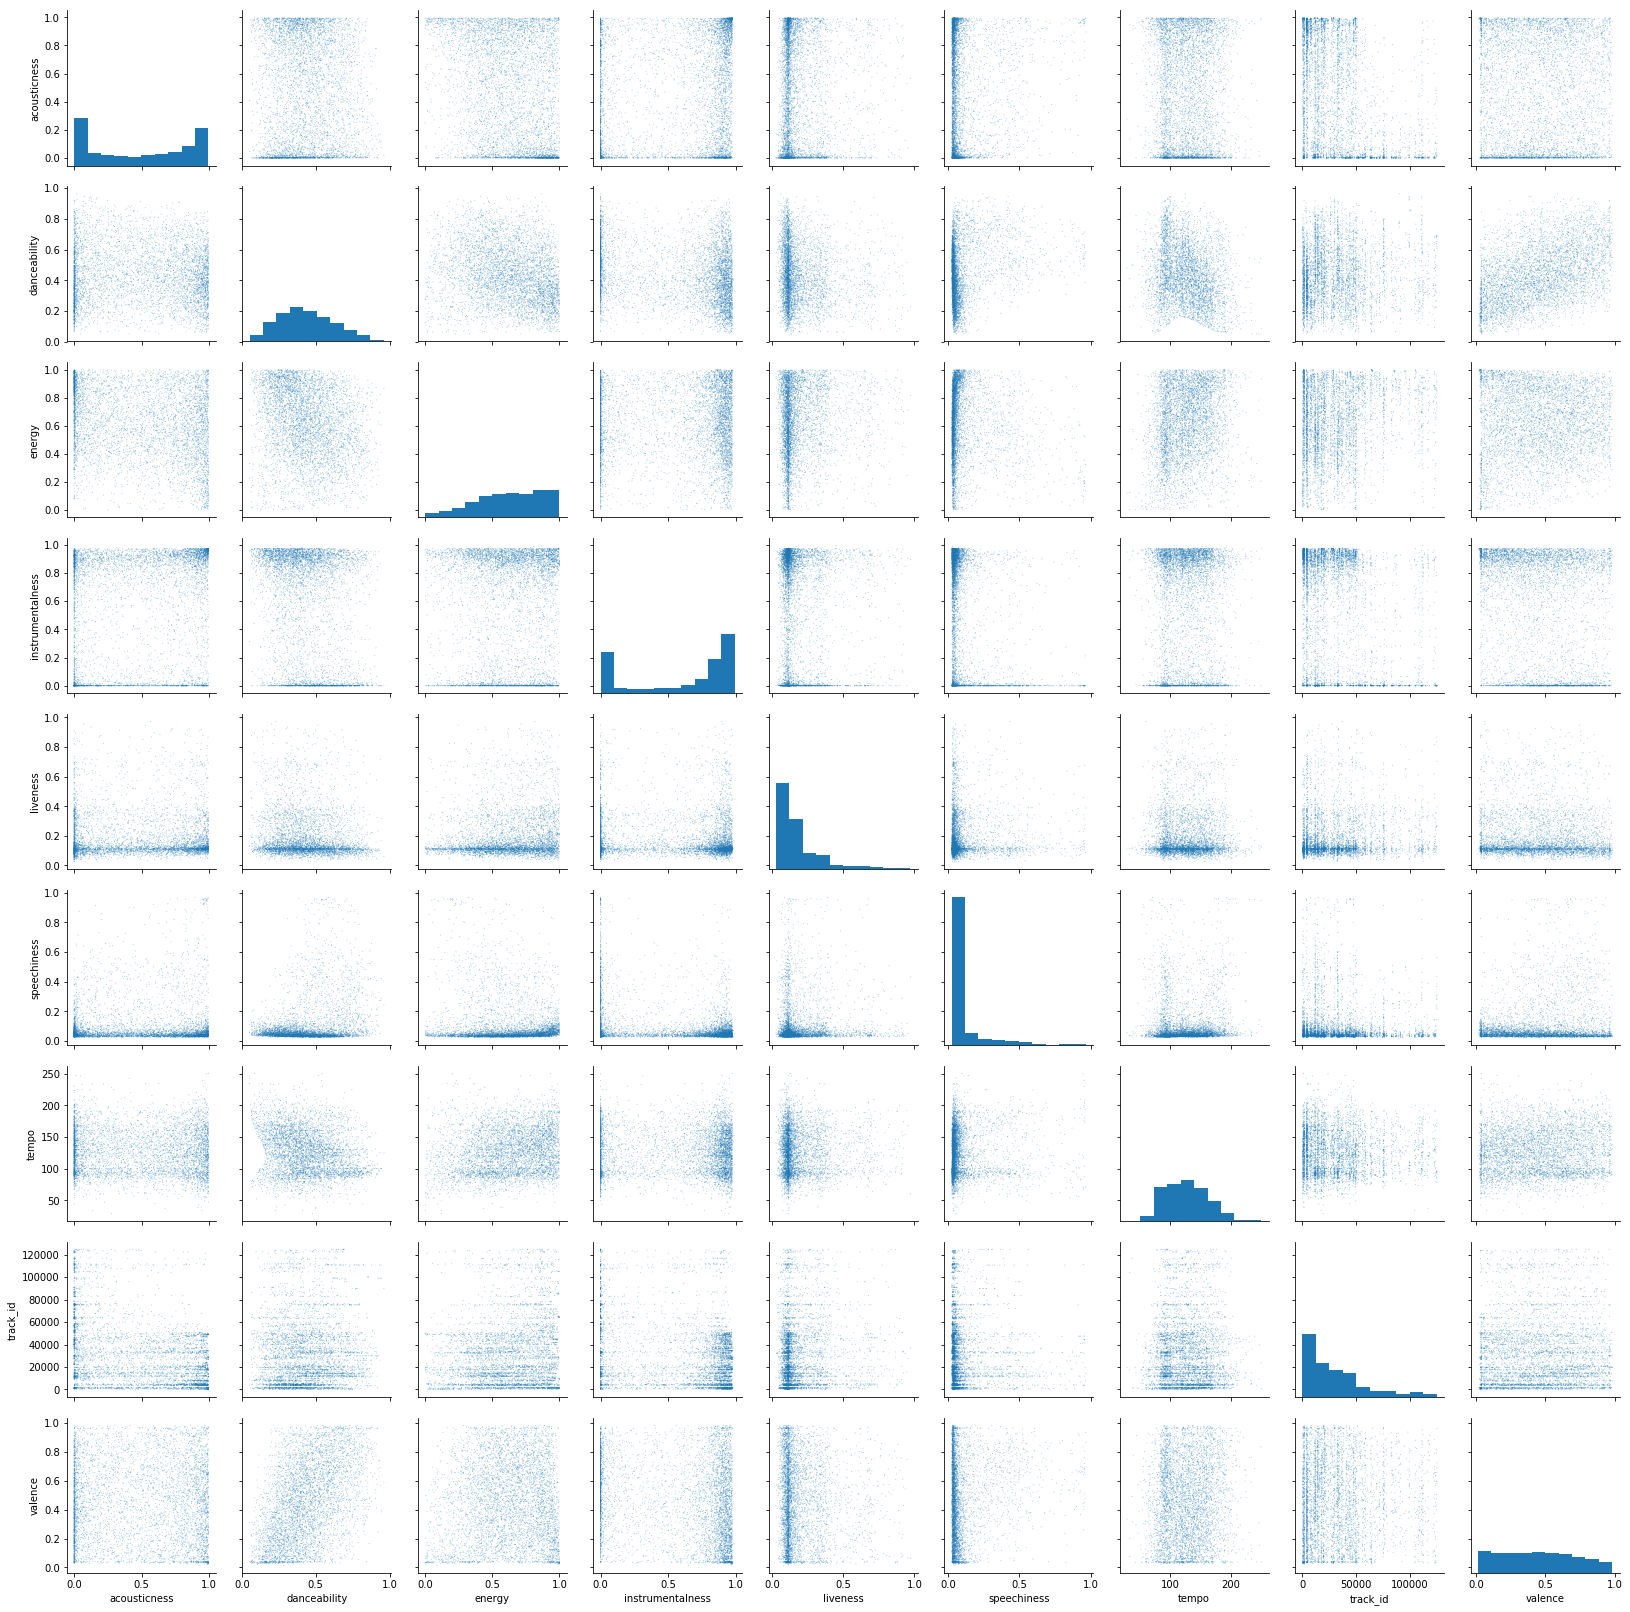

In [25]:
# TODO look up why not to have corr var in classi
import seaborn as sns

sns.pairplot(echo_tracks, plot_kws={'s':1, 'edgecolor':'none', 'alpha':0.4})

In [28]:
# Lina look into mutual info
track_metrics.corr().style.background_gradient()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,track_id,valence
acousticness,1,-0.189599,-0.477273,0.110033,0.0413193,0.0387845,-0.110701,-0.279829,-0.0854362
danceability,-0.189599,1,0.0453446,-0.118033,-0.143339,0.171311,-0.0943519,0.102056,0.428515
energy,-0.477273,0.0453446,1,-0.00241179,0.0457524,-0.00864488,0.227324,0.121991,0.219384
instrumentalness,0.110033,-0.118033,-0.00241179,1,-0.0585932,-0.216689,0.0230032,-0.283206,-0.1452
liveness,0.0413193,-0.143339,0.0457524,-0.0585932,1,0.0731041,-0.00756641,-0.00405934,-0.0178859
speechiness,0.0387845,0.171311,-0.00864488,-0.216689,0.0731041,1,0.0321876,-0.0750767,0.0947941
tempo,-0.110701,-0.0943519,0.227324,0.0230032,-0.00756641,0.0321876,1,0.004313,0.129911
track_id,-0.279829,0.102056,0.121991,-0.283206,-0.00405934,-0.0750767,0.004313,1,0.0202007
valence,-0.0854362,0.428515,0.219384,-0.1452,-0.0178859,0.0947941,0.129911,0.0202007,1


There does not appear to be highly correlated variables in this data set.. Let's proceed..

## PCA and visualization

Possibly the variance between genres could be explained largely by just a few variables in the data set. To find these, a commonly used approach is Principal Component analysis .... add simple explanation/.. Use a suitrable dimensionality reduction techineque.

In [133]:
# Preprocess data by assigning all numerical features to the `features`
# variable and the classes that we want to predict as the `labels` variable
features = echo_tracks.drop(['genre_top', 'title', 'track_id'], axis=1) 
labels = echo_tracks['genre_top']
# features = rock_hop_bal.drop(['genre_top', 'title', 'track_id'], axis=1) 
# labels = rock_hop_bal['genre_top']

array([9.99584829e-01, 1.50813597e-04, 1.09894036e-04, 6.13556562e-05,
       4.46259692e-05, 1.86855360e-05, 1.73251619e-05, 1.24709865e-05])

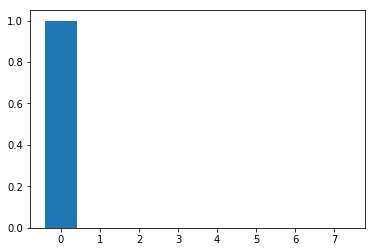

In [134]:
# Discover that the data needs to be scaled 0-1
# TODO, alternatively the tempo column should be dropped or scaled alone since scaling the 
# other columns could remove important difference in the range of those already variables
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

pca = PCA()
pca.fit(features)

fig, ax = plt.subplots()
x = range(len(pca.explained_variance_))
y = pca.explained_variance_ratio_
ax.bar(x, y)
y

O hOhhhhhhhh, something is wrong. The variance in the data seems to be almost exclusively explained by just a single variable, whyyyyyyyy? Let's compare the avarianvece betwewnenew nfeatues

In [135]:
features.var()

acousticness           0.135623
danceability           0.033712
energy                 0.059492
instrumentalness       0.141620
liveness               0.022406
speechiness            0.021223
tempo               1156.896876
valence                0.071038
dtype: float64

Use a suitable scaling method to transform your data .

array([0.24292147, 0.18052537, 0.13600336, 0.13009104, 0.11089531,
       0.08315098, 0.06938579, 0.04702668])

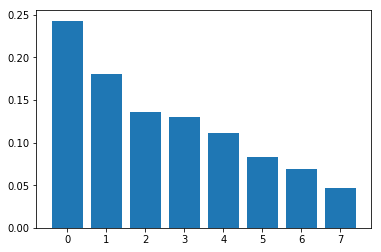

In [136]:
# TODO check if they did bar or line for the scree
# Do it the right way with scaled data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(features)

pca = PCA()
pca.fit(scaled_train_features)

fig, ax = plt.subplots()
x = range(len(pca.explained_variance_))
y = pca.explained_variance_ratio_
ax.bar(x, y)
y

There does not appear to be a clear elbow point in this scree plot. We can still try to visualize the data using the top 2 PCs. 

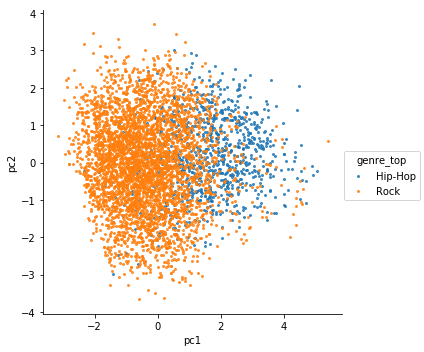

In [137]:
# Create a data frame for plotting with seaborn (alternatively a groupby loop could be used)
# Notice that there is no clear decision boundary to be drawn from the first two PCA components.

comps = pca.transform(scaled_train_features)
# TODO could include the trackis as index here to easy reference the other frame
# Or merge the two frames
comps_df = pd.DataFrame({'pc1': comps[:, 0],
                         'pc2': comps[:, 1],
                         'genre_top': labels.values})#, columns=['pc1', 'pc2']).reset_index()

sns.lmplot('pc1', 'pc2', hue='genre_top', data=comps_df, fit_reg=False, scatter_kws={'s':4})

## Compare the predictive power of logistic regression and a decision tree

It is typical to crossvalidate our models by splitting our training data different ways. One common methods is using K-fold crossvalidation.

They should play around with some parameters here, and maybe also visualize the result somehow (parallel coordinates, tSNE)? 

Do tree with one data split set, understand basic workflow

In [138]:
# TODO should this be done different with K-fold cross-validation? Or should that be a later task?
# Divide the data and the labels into a train and test set
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, random_state=10)

In [139]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=10, class_weight='balanced')
tree.fit(train_features, train_labels)
tree.score(test_features, test_labels)

0.8681135225375626

Cross val, understand split matters for predict power

In [140]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(random_state=10)
cross_val_score(tree, features, labels, cv=kf)

array([0.88666249, 0.81829574, 0.88596491])

# Compare cross val mean between two models (tree and logit), understand model diffs

In [141]:
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression(random_state=10, class_weight='balanced') # random state doesn't matter here?
logreg.fit(train_features, train_labels)
logreg.score(test_features, test_labels)

0.8797996661101837

In [113]:
hop_only = echo_tracks.loc[echo_tracks['genre_top'] == 'Hip-Hop']
num_hop = hop_only.shape[0]
rock_only = echo_tracks.loc[echo_tracks['genre_top'] == 'Rock'].sample(num_hop)

In [119]:
rock_hop_bal = pd.concat([rock_only, hop_only])

In [130]:
predicted_labels = logreg.predict(test_features)
conf_df = pd.DataFrame(confusion_matrix(test_labels, predicted_labels))
(conf_df / conf_df.sum(axis=1)).style.background_gradient()

,0,1
0,0.821739,0.182222
1,0.147826,0.848889


In [144]:
predicted_labels = logreg.predict(test_features)
conf_df = pd.DataFrame(confusion_matrix(test_labels, predicted_labels))
(conf_df.iterows() / conf_df.sum(axis=1)).style.background_gradient()

AttributeError: 'DataFrame' object has no attribute 'iterows'

In [143]:
print(classification_report(test_labels, predicted_labels))

             precision    recall  f1-score   support

    Hip-Hop       0.67      0.83      0.74       249
       Rock       0.95      0.89      0.92       949

avg / total       0.89      0.88      0.88      1198



There is no obvious bias in the prediction power between the classes, so we don't need to worry about correcting for this. THIS IS A LIEEEE!

So they should do it all and then see that the hip-hop class is not well predicted and then either weight the classes or subset the data.

In [132]:
print(classification_report(test_labels, predicted_labels))

             precision    recall  f1-score   support

    Hip-Hop       0.85      0.82      0.83       230
       Rock       0.82      0.85      0.84       225

avg / total       0.84      0.84      0.84       455



In [94]:
from sklearn.metrics import confusion_matrix, classification_report
# Compute and print the confusion matrix and classification report
classification_report(test_labels, predicted_labels)
confusion_matrix(test_labels, predicted_labels)

NameError: name 'predicted_labels' is not defined

# Other things we could include

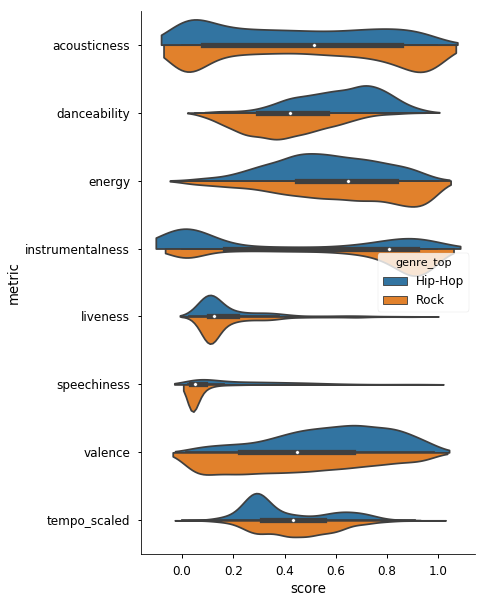

In [14]:
# Explore which variables are different between the two
# We should get them to do something like this, highly informative for getting a sense of which features matters!
echo_tracks['tempo_scaled'] = (echo_tracks['tempo'] - echo_tracks['tempo'].min()) / (
    echo_tracks['tempo'].max() - echo_tracks['tempo'].min())
echo_tracks_long = pd.melt(echo_tracks.drop(['track_id', 'title', 'tempo'], axis=1), id_vars=['genre_top'],
        var_name='metric', value_name='score')
plt.figure(figsize=(6, 10))
sns.set_context('notebook', font_scale=1.2)
sns.violinplot('score', 'metric', 'genre_top', echo_tracks_long, split=True, cut=1)
sns.despine()

In [93]:
from sklearn.manifold import TSNE


tsne = TSNE(learning_rate=100)
plot_points = tsne.fit_transform(comps)

plot_df = pd.DataFrame({'x': plot_points[:, 0],
                        'y': plot_points[:, 1],
                        'genre': train_labels.values})
g = sns.FacetGrid(plot_df, hue='genre', size=5)
g.map(plt.scatter, 'x', 'y', s=4)
g.ax.legend()

ValueError: arrays must all be same length

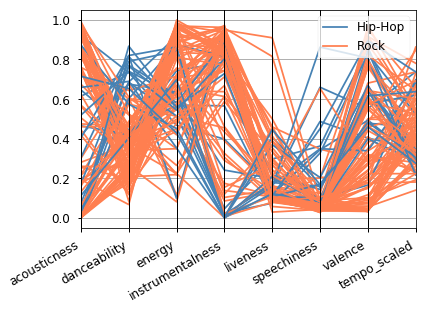

In [18]:
from pandas.plotting import parallel_coordinates

ax = parallel_coordinates(echo_tracks.drop(['track_id', 'title', 'tempo'], axis=1).sample(100),
                     class_column='genre_top', color=['steelblue', 'coral'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right');

In [94]:
from sklearn.metrics import confusion_matrix, classification_report
# Compute and print the confusion matrix and classification report
classification_report(test_labels, predicted_labels)
confusion_matrix(test_labels, predicted_labels)

NameError: name 'predicted_labels' is not defined

NameError: name 'predicted_labels' is not defined